# Burgers Equation

In this notebook I will solve the Burgers equation $u_t + u \cdot u_x=0$ using as an initial condition the profile $u(x,t=0)= 10 \exp{[-(x-x_0)^2]}$ with $x_0=5$. I chose the domain in a way that $x\in [0,10]$ with periodic boundary conditions. There will be two ways I will adrees the problem with: by solving the non conservative equation, or the conservative equation. The results I expect are both convergent, but in the non conservative form to the wrong solution.

## Non conservative form

In this section I will solve the non conservative form of the Burgers equation. I will try to change the resolution to see that no matter how precise I choose to be, I always end up having a convergence to the wrong solution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
# Define the domain
L = 10.0     # Domain length
nx = 501    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5

# choose the dt wisely: 

t_final = 0.5


# Define the initial condition
x0=5
u_initial = 10 * np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

dt = np.min(cf*dx/u_initial)  

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 501
dx= 0.02
dt= 0.001
Number of iterations= 500.0


## Solution of the equation: 

In [3]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, c='grey')
plt.title('Time='+str(round(t,2)))

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    u_next = u_current - dt / dx * u_current * (u_current - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    if (i%10==0):
        plt.plot(x, u_current, c='grey')
        plt.title('Time='+str(round(t,2)), fontsize=13)
        plt.ylim(0,10.1)
        plt.xlabel("x [IU]")
        plt.ylabel("$\mathrm{u}(x, t)$")
        plt.savefig('./images/Burgers/NC/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

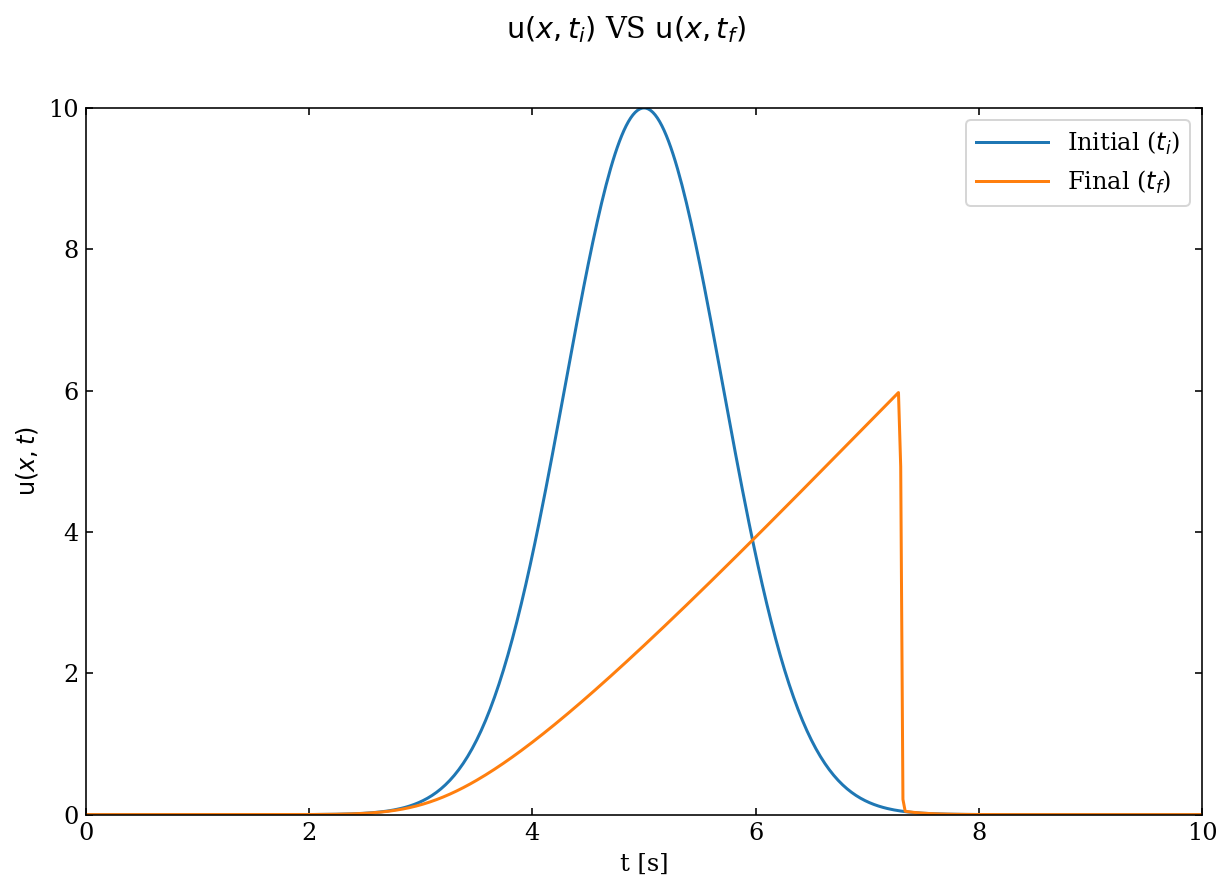

In [4]:
# Plot the final solution
plt.figure(figsize = (10, 6.5))
plt.plot(x, u_initial, label='Initial ($t_i$)')
plt.plot(x, u_current, label='Final ($t_f$)')
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.suptitle("$\mathrm{u}(x, t_i)$ VS $\mathrm{u}(x, t_f)$")
plt.show()

See the values of the norm as time passes: 

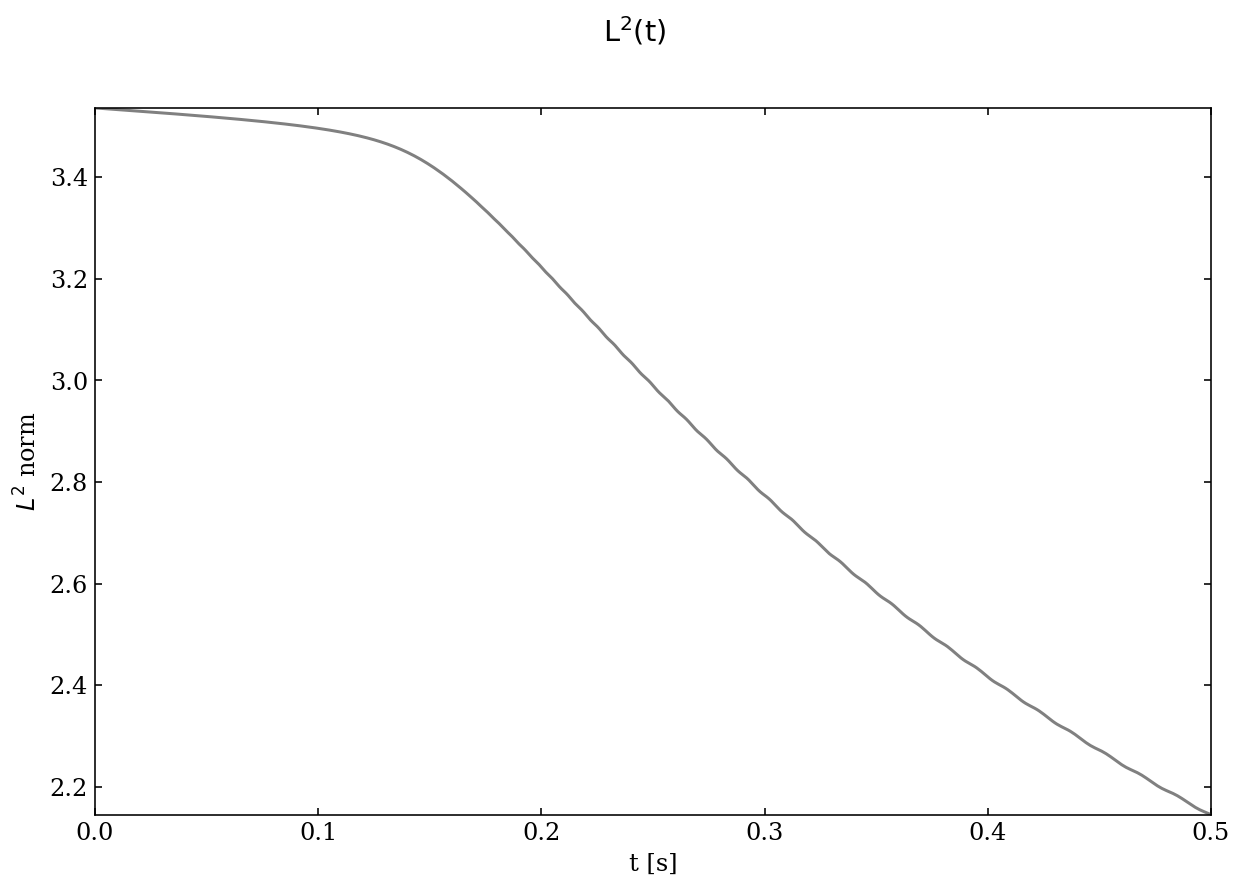

In [5]:
plt.figure(figsize = (10, 6.5))
plt.plot(time,l2norm, c='grey')
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.savefig('norm_burg_nc.png')
plt.show()

### FuncAnimation animations:

Here I just report an additional code I developed to see animation without having to save the images every time.

In [6]:
import matplotlib.animation as animation
import matplotlib
matplotlib.use("TkAgg")

<IPython.core.display.Javascript object>


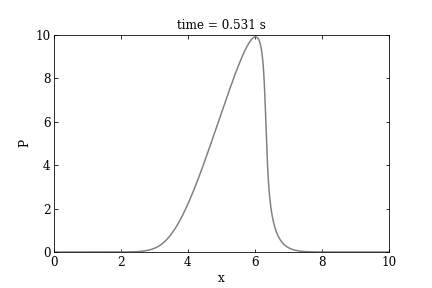

In [7]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, '-', c='grey')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,10.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"time = {t/98 * 0.5:.3f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 2), blit=True)
ani.save('non_cons.gif')
plt.show()